In [244]:
%matplotlib inline
# %matplotlib qt

In [245]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import arc
import time
from mpl_toolkits.mplot3d import Axes3D
import pylab
import matplotlib.animation as animation
from IPython.display import HTML


In [12]:
#Our operators
create_destroy = tensor(create(2),destroy(2))
destroy_create = tensor(destroy(2),create(2))
create_create = tensor(create(2),create(2)) 
destroy_destroy = tensor(destroy(2),destroy(2))

#Our TI-hamiltonians
H0_single = create_destroy+destroy_create
H0_create = create_create
H0_destroy = destroy_destroy
H0_create_destroy = H0_destroy+H0_create

#Our states
single_excitation=tensor(basis(2,0),basis(2,1))
no_excitation=tensor(basis(2,0),basis(2,0))
double_excitation=tensor(basis(2,1),basis(2,1))

#Time and observation bases
tlist = np.linspace(0,np.pi,100)
qobj2state = {'00':1/4*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz()),
        '01':1/4*tensor((qeye(2)+sigmaz()),(qeye(2)-sigmaz())),
        '10':1/4*tensor((qeye(2)-sigmaz()),(qeye(2)+sigmaz())),
        '11':1/4*tensor((qeye(2)-sigmaz()),qeye(2)-sigmaz())}

In [505]:
def plot_2particle_hamiltonian(ham,state,basis):
    result = sesolve(ham,state,tlist,basis)
    plt.plot(tlist,result.expect['10'], '-b', label='state 10')
    plt.plot(tlist,result.expect['01'], '-r', label='state 01')
    plt.plot(tlist,result.expect['00'], '-g', label='state 00')
    plt.plot(tlist,result.expect['11'], '-y', label='state 11')
    pylab.legend(loc='upper right')
    plt.show()

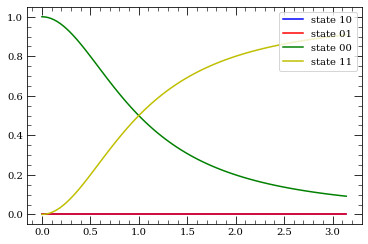

In [380]:
plot_2particle_hamiltonian(H0_create,no_excitation,qobj2state)

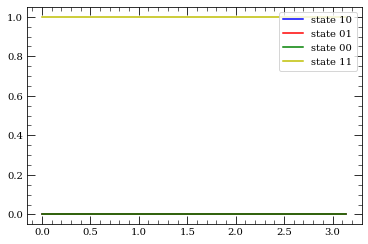

In [381]:
plot_2particle_hamiltonian(H0_create,double_excitation,qobj2state)

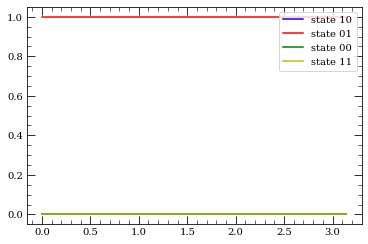

In [382]:
plot_2particle_hamiltonian(H0_create,single_excitation,qobj2state)

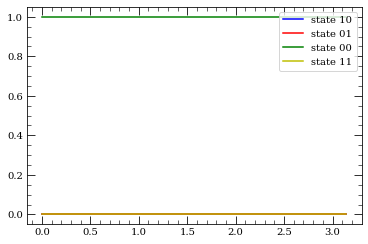

In [383]:
plot_2particle_hamiltonian(H0_single,no_excitation,qobj2state)

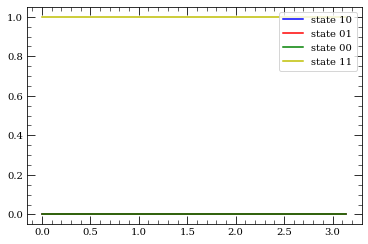

In [384]:
plot_2particle_hamiltonian(H0_single,double_excitation,qobj2state)

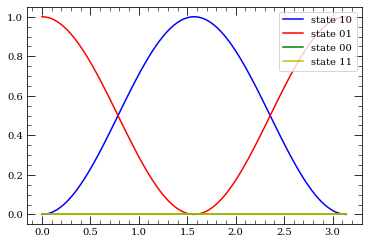

In [385]:
plot_2particle_hamiltonian(H0_single,single_excitation,qobj2state)

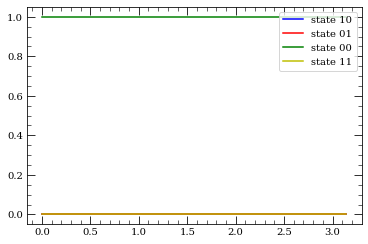

In [386]:
plot_2particle_hamiltonian(H0_destroy,no_excitation,qobj2state)

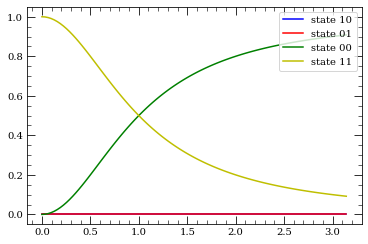

In [387]:
plot_2particle_hamiltonian(H0_destroy,double_excitation,qobj2state)

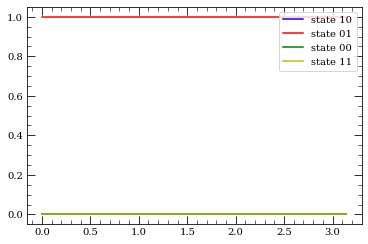

In [388]:
plot_2particle_hamiltonian(H0_destroy,single_excitation,qobj2state)

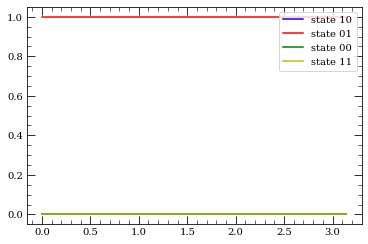

In [390]:
plot_2particle_hamiltonian(H0_create_destroy,single_excitation,qobj2state)

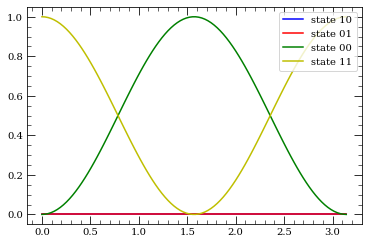

In [391]:
plot_2particle_hamiltonian(H0_create_destroy,double_excitation,qobj2state)

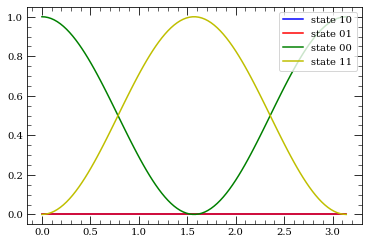

In [392]:
plot_2particle_hamiltonian(H0_create_destroy,no_excitation,qobj2state)

In [618]:
#3 particle hamiltonian
H0_3particle_single = tensor(create(2),destroy(2),qeye(2))+tensor(destroy(2),create(2),qeye(2))+\
                 tensor(qeye(2),destroy(2),create(2))+tensor(qeye(2),create(2),destroy(2))

H0_3particle_single_periodic = tensor(create(2),destroy(2),qeye(2))+tensor(destroy(2),create(2),qeye(2))+\
                 tensor(qeye(2),destroy(2),create(2))+tensor(qeye(2),create(2),destroy(2))+\
                 tensor(destroy(2),qeye(2),create(2))+tensor(create(2),qeye(2),destroy(2))

#Our states
single_excitation_3state=tensor(basis(2,0),basis(2,0),basis(2,1))


#Time and observation bases
tlist = np.linspace(0,2*np.pi,100)
qobj3state = {'000':1/8*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
        '001':1/8*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)-sigmaz()),
        '010':1/8*tensor((qeye(2)+sigmaz()),qeye(2)-sigmaz(),qeye(2)+sigmaz()),
        '100':1/8*tensor((qeye(2)-sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz())
        }

def plot_3particle_hamiltonian(ham,state,basis):
    result = sesolve(ham,state,tlist,basis)
    plt.plot(tlist,result.expect['000'], '-b', label='state 000')
    plt.plot(tlist,result.expect['001'], '-r', label='state 001')
    plt.plot(tlist,result.expect['010'], '-g', label='state 010')
    plt.plot(tlist,result.expect['100'], '-y', label='state 100')
    pylab.legend(loc='upper right')
    plt.show()

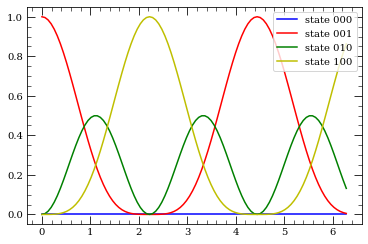

In [466]:
plot_3particle_hamiltonian(H0_3particle_single,single_excitation_3state,qobj3state)

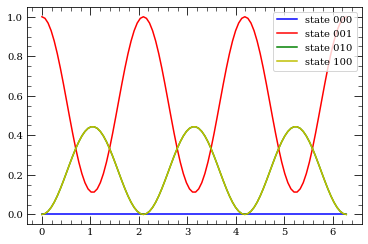

In [619]:
plot_3particle_hamiltonian(H0_3particle_single_periodic,single_excitation_3state,qobj3state)

In [269]:
H0_9particle_grid = 
tensor(create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2))+\
tensor(destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2))+\
tensor(create(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),qeye(2))+\
tensor(destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),create(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),destroy(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2))+\
tensor(qeye(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),destroy(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),create(2),qeye(2))

single_excitation_9state=tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0))

#Time and observation bases
tlist = np.linspace(0,10*np.pi,500)
qobj3state = {'000000001':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz()),
              '000000010':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz()),
              '000000100':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '000001000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '000010000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '000100000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '001000000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '010000000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
              '100000000':1/512*tensor((qeye(2)-sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
             }
def update(i):
    global ax
    global fig
    ax.cla()
    ax = fig.add_subplot(111)
    x = ["1","2","3"]
    y = ["1","2","3"]
    z = np.array([[result.expect['000000001'][i],result.expect['000000010'][i],result.expect['000000100'][i]],
     [result.expect['000100000'][i],result.expect['000010000'][i],result.expect['000001000'][i]],
     [result.expect['001000000'][i],result.expect['010000000'][i],result.expect['100000000'][i]]])
    im = ax.imshow(z)
    return fig

def plot_9particleGrid_hamiltonian(ham,state,basis):
    result = sesolve(ham,state,tlist,basis)
    plt.plot(tlist,result.expect['000000001'],  label='state 000000001')
    plt.plot(tlist,result.expect['000000010'],  label='state 000000010')
    plt.plot(tlist,result.expect['000000100'],  label='state 000000100')
    plt.plot(tlist,result.expect['000001000'], label='state 000001000')
    plt.plot(tlist,result.expect['000010000'], label='state 000010000')
    plt.plot(tlist,result.expect['000100000'], label='state 000100000')
    plt.plot(tlist,result.expect['001000000'], label='state 001000000')
    plt.plot(tlist,result.expect['010000000'],label='state 010000000')
    plt.plot(tlist,result.expect['100000000'], label='state 100000000')
    pylab.legend(loc='upper right')
    plt.show()
    
def plotHeatMapGrid(data):
    z = [[data[0],data[1],data[2]],[data[5],data[4],data[3]],[data[6],data[7],data[8]]]
    im = ax.imshow(z)
    return z
   
def plotTimeIntegralGrid(result,ax,tlist):
    global fig
    probs = np.zeros(len(result.expect))
    for i in range(len(tlist)-1):
        probs += np.array([value[i] for key,value in result.expect.items()])
    probs/=len(tlist)
    plt.imshow(plotHeatMapGrid(probs))

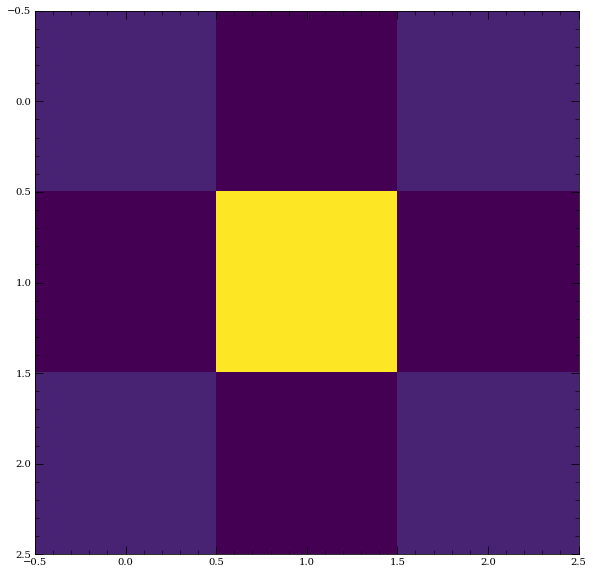

In [275]:
tlist = np.linspace(0,15*np.pi,1000)
result = sesolve(H0_9particle_grid,single_excitation_9state,tlist,qobj3state)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plotTimeIntegralGrid(result,ax,tlist)
# Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
# animation.FuncAnimation(fig, update,frames=500, interval=1).save('qwalkgrid.mp4', writer=writer)

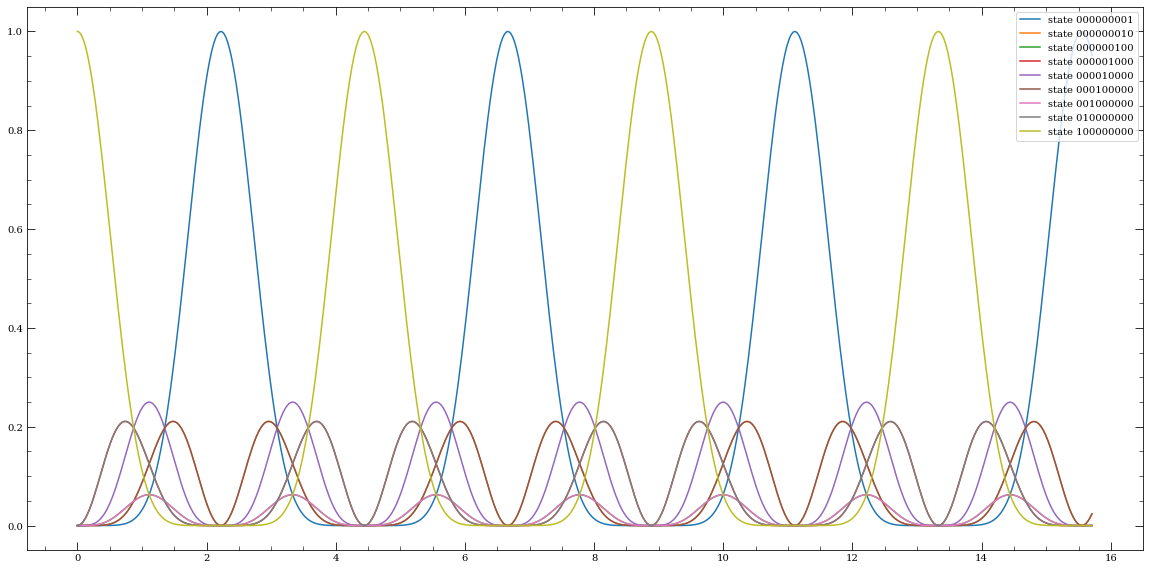

In [609]:
single_excitation_9state=tensor(basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0))
fig = plt.figure(figsize=(20,10))
plot_9particleGrid_hamiltonian(H0_9particle_grid,single_excitation_9state,qobj3state)

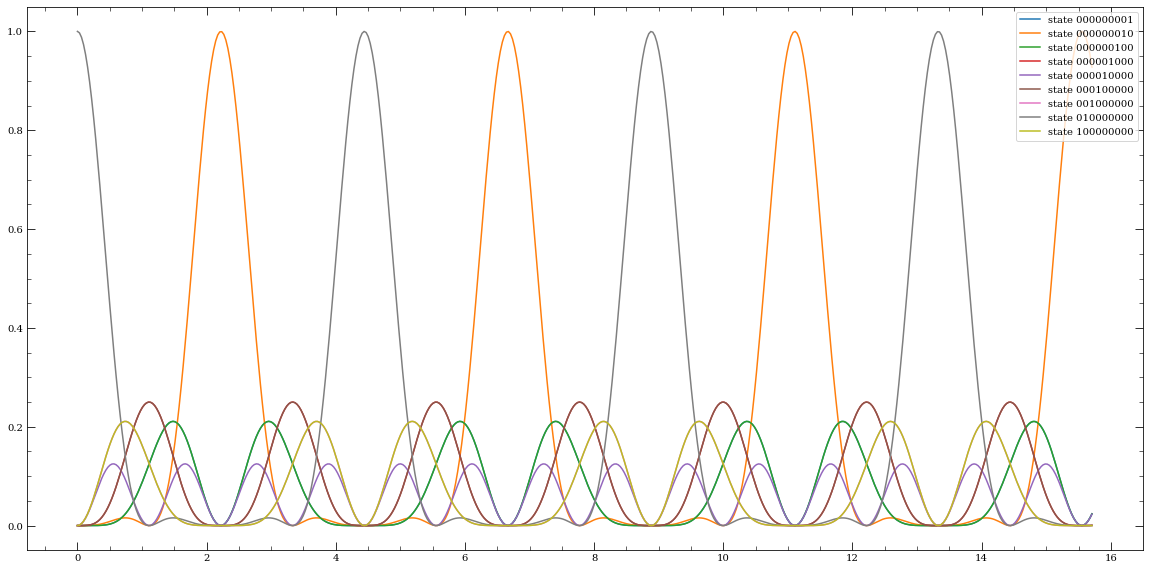

In [610]:
single_excitation_9state=tensor(basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0))
fig = plt.figure(figsize=(20,10))
plot_9particleGrid_hamiltonian(H0_9particle_grid,single_excitation_9state,qobj3state)

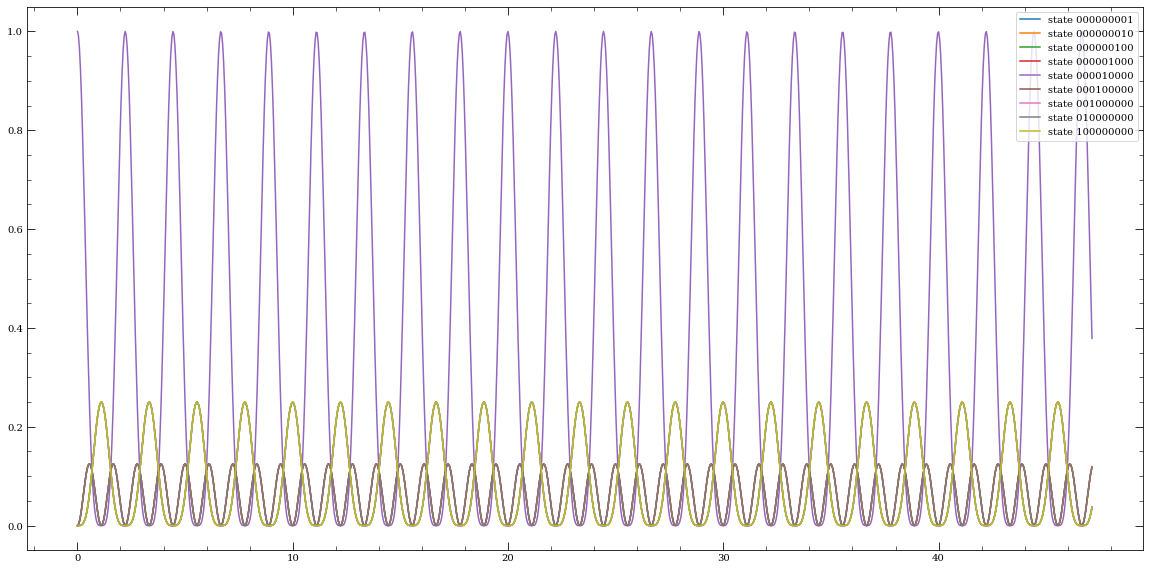

In [276]:
single_excitation_9state=tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0))
fig = plt.figure(figsize=(20,10))
plot_9particleGrid_hamiltonian(H0_9particle_grid,single_excitation_9state,qobj3state)

In [301]:
H0_8particle_ring = \
tensor(create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2),qeye(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),create(2),destroy(2))+\
tensor(qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),qeye(2),destroy(2),create(2))+\
tensor(qeye(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),qeye(2),create(2))+\
tensor(qeye(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),qeye(2),destroy(2))+\
tensor(create(2),qeye(2),qeye(2),qeye(2),destroy(2),qeye(2),qeye(2),qeye(2))+\
tensor(destroy(2),qeye(2),qeye(2),qeye(2),create(2),qeye(2),qeye(2),qeye(2))

single_excitation_8state_ring=tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0))

#Time and observation bases
qobj3state_ring = {'000000001':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz()),
                   '000000010':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz()),
                   '000000100':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                   '000001000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                   '000100000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                   '001000000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)+sigmaz(),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                   '010000000':1/512*tensor((qeye(2)+sigmaz()),qeye(2)-sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                   '100000000':1/512*tensor((qeye(2)-sigmaz()),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz(),qeye(2)+sigmaz()),
                 }
def update(i):
    global ax
    global fig
    ax.cla()
    ax = fig.add_subplot(111)
    x = ["1","2","3"]
    y = ["1","2","3"]
    z = np.array([[result.expect['000000001'][i],result.expect['000000010'][i],result.expect['000000100'][i]],
     [result.expect['000100000'][i],0,result.expect['000001000'][i]],
     [result.expect['001000000'][i],result.expect['010000000'][i],result.expect['100000000'][i]]])
    im = ax.imshow(z)
    return fig

def plot_9particleGrid_hamiltonian(ham,state,basis):
    result = sesolve(ham,state,tlist,basis)
    plt.plot(tlist,result.expect['000000001'], label='state 000000001')
    plt.plot(tlist,result.expect['000000010'], label='state 000000010')
    plt.plot(tlist,result.expect['000000100'], label='state 000000100')
    plt.plot(tlist,result.expect['000001000'], label='state 000001000')
    plt.plot(tlist,result.expect['000100000'], label='state 000100000')
    plt.plot(tlist,result.expect['001000000'], label='state 001000000')
    plt.plot(tlist,result.expect['010000000'], label='state 010000000')
    plt.plot(tlist,result.expect['100000000'], label='state 100000000')
    pylab.legend(loc='upper right')
    plt.show()

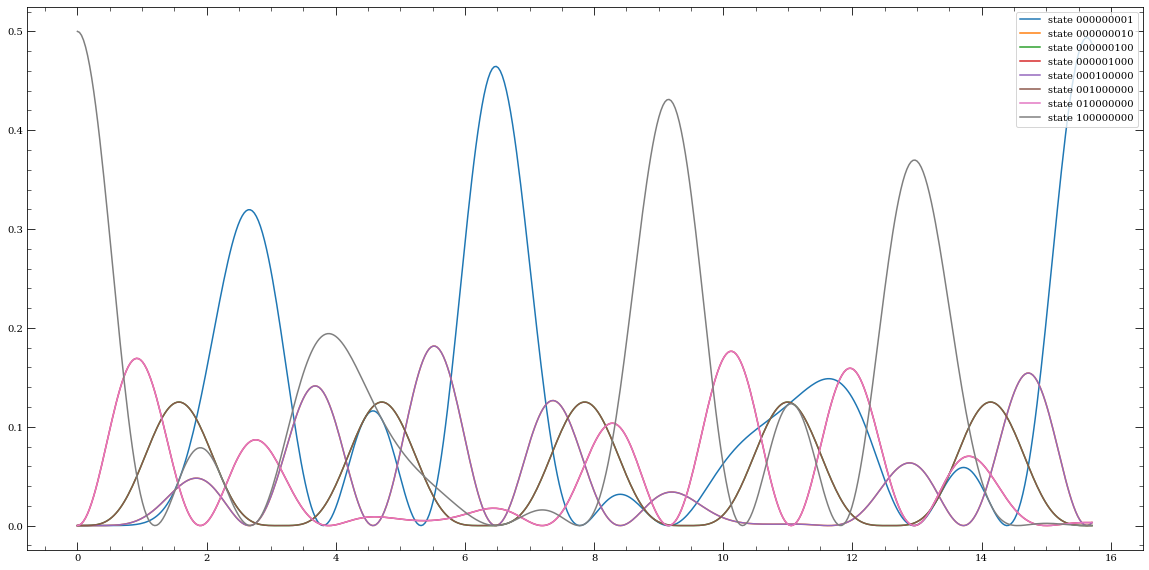

In [289]:
single_excitation_8state=tensor(basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0))
fig = plt.figure(figsize=(20,10))
plot_9particleGrid_hamiltonian(H0_8particle_ring,single_excitation_8state,qobj3state_ring)

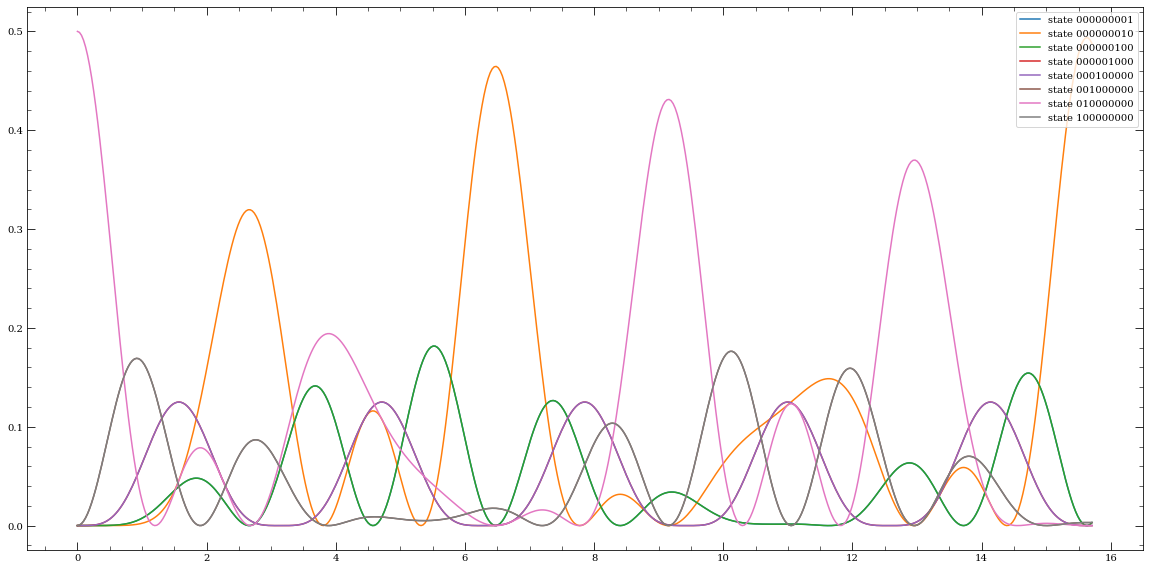

In [640]:
single_excitation_8state=tensor(basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,0))
fig = plt.figure(figsize=(20,10))
plot_9particleGrid_hamiltonian(H0_8particle_ring,single_excitation_8state,qobj3state_ring)

In [309]:
np.linspace(0,25*np.pi,101)




array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714,  6.28318531,  7.06858347,
        7.85398163,  8.6393798 ,  9.42477796, 10.21017612, 10.99557429,
       11.78097245, 12.56637061, 13.35176878, 14.13716694, 14.9225651 ,
       15.70796327, 16.49336143, 17.27875959, 18.06415776, 18.84955592,
       19.63495408, 20.42035225, 21.20575041, 21.99114858, 22.77654674,
       23.5619449 , 24.34734307, 25.13274123, 25.91813939, 26.70353756,
       27.48893572, 28.27433388, 29.05973205, 29.84513021, 30.63052837,
       31.41592654, 32.2013247 , 32.98672286, 33.77212103, 34.55751919,
       35.34291735, 36.12831552, 36.91371368, 37.69911184, 38.48451001,
       39.26990817, 40.05530633, 40.8407045 , 41.62610266, 42.41150082,
       43.19689899, 43.98229715, 44.76769531, 45.55309348, 46.33849164,
       47.1238898 , 47.90928797, 48.69468613, 49.48008429, 50.26548246,
       51.05088062, 51.83627878, 52.62167695, 53.40707511, 54.19

/Users/jordankemp/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


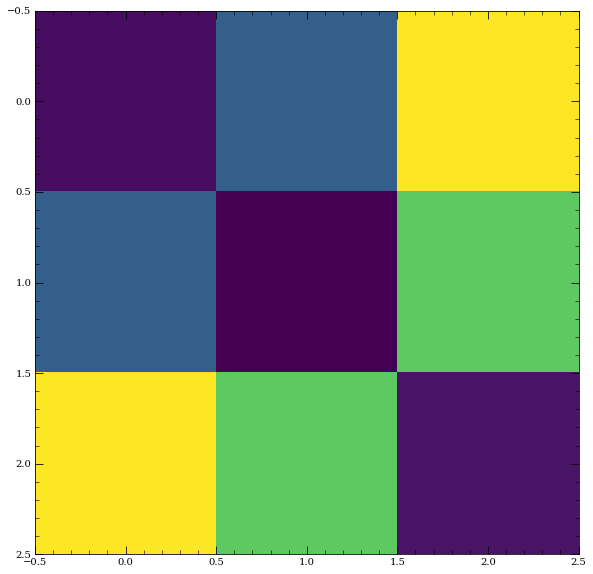

In [335]:
tlist = np.linspace(0,14.45*np.pi,51)
result = sesolve(H0_8particle_ring,single_excitation_8state,tlist,qobj3state_ring)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
animation.FuncAnimation(fig, update,frames=51, interval=1).save('qwalkring.mp4', writer=writer)

In [ ]:
greiner group
boson sampling - photon to beam splitter

In [649]:
op2state = {"c":create(2),"a":destroy(2),"i":qeye(2),"z":sigmaz()}

def gen2lvlState(n,states):
    Qobj()
    state = basis(2,states[0])
    for i in range(1,n):
        state =tensor(state,basis(2,states[i]))
    return state

def gen2lvlOperator(n,operators):
    oper = tensor(op2state[operators[0]])
    for i in range(1,n):
        oper = tensor(oper,op2state[operators[0]])
    return oper 


def addLeadingZeros(string,num):
    for n in range(num):
        string = "0"+string
    return string

def genKeys(n,num_states):
    num_arr = [format(i,"b") for i in range(2**n)]
    i = 0
    while i < len(num_arr):
        count = np.sum(np.array(list(num_arr[i])).astype(int))
        if count != num_states:
            None
            del(num_arr[i])
#             print("removed " + str(val))
            i -= 1
        else: 
            num_arr[i] = addLeadingZeros(num_arr[i],n-len(num_arr[i]))
            i += 1
    return num_arr

def genBasisArbitrary(n,num_states):
    
    assert(n>=num_states)
    basis = {}
    keys = genKeys(n,num_states)
    
    for key in keys:

        key_as_int = np.array(list(key)).astype(int)
        eigv = qeye(2)+(1-2*int(key_as_int[0]==1))*sigmaz()
        
        for i in range(1,n):
            
            eigv = tensor(eigv,qeye(2)+(1-2*int(key_as_int[i]==1))*sigmaz())
        basis[key]=(1/2**n)*eigv
    return basis
     
def adj_to_ham(n): #The row/col of an adj matrix corresponds to Hamiltonian via
    return int(2**(n-1))
    
def genHamiltonianFromAdjMatrix(adj_matrix):
    x = len(adj_matrix)
    dims = [2 for i in range(x)]
    array = np.array([np.zeros(2**x) for i in range(2**x)])
    for i in range(x):
        for j in range(x):
            if adj_matrix[i][j] != 0:
                array[adj_to_ham(i+1)][adj_to_ham(j+1)] = adj_matrix[i][j]
    return Qobj(array,dims = [dims, dims], shape = (2**x, 2**x))

def genAdjMatrix(dim,pairs):

    matrix = np.array([np.zeros(dim) for i in range(dim)])
    
    for pair in pairs:
        matrix[pair[0][0],pair[0][1]] = pair[1]
    
    return matrix
     
def plotHeatMap(z_entries,z_len,ax):
    zeros = np.zeros(int(len(z_entries)/2))
    z_entries_top = np.vstack(([z_entries[i*2] for i in range(int(len(z_entries)/2))],zeros)).reshape((-1,),order='F')
    z_entries_bot = np.vstack((zeros,[z_entries[i*2+1] for i in range(int(len(z_entries)/2))])).reshape((-1,),order='F')
    z= [z_entries_top,z_entries_bot]
    return z
   
def plotTimeIntegral(result,ax,tlist):
    global fig
    probs = np.zeros(len(result.expect))
    for i in range(len(tlist)-1):
        probs += np.array([value[i] for key,value in result.expect.items()])
    probs/=len(tlist)
    plt.imshow(plotHeatMap(probs,len(probs),ax))
    
def updateZigZag(i):
    global ax
    global fig
    ax.cla()
    ax = fig.add_subplot(111)
    z_entries = np.array([value[i] for key,value in result.expect.items()])
    plotHeatmap(z_entries,len(z_entries))
    return fig 



In [655]:
#Alternating "on" and "off" starting from edge
def genAdjEnd(arr_len,w1,w2):
    lst=[]
    for i in range(arr_len):
        i=i*2
        lst.append([[i,(i+1)],w1])
        lst.append([[(i+1),i],w1])
        lst.append([[i+1,(i+2)],w2])
        lst.append([[(i+2),i+1],w2])
    del(lst[-1])
    del(lst[-1])
    return lst
        
def genAdjMid(arr_len,w1,w2):
    w=[w1,w1]
    lst = []
    mid = int(arr_len/2)

    for i in range(int((arr_len-1)/2)):
        j = i%2
#       i = i
        lst.append([[mid+i,mid+i+1],w[j]])
        lst.append([[mid+i+1,mid+i],w[j]])
        lst.append([[mid-i,mid-i-1],w[j]])
        lst.append([[mid-i-1,mid-i],w[j]])            
    return lst

def runHamiltonian(opt,len,state_ind,obs_basis,w1,w2,time,step):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    space_size = 2*len
    tlist = np.linspace(0,time,step)

    if opt == "end":
        adj_matrix = genAdjMatrix(space_size,genAdjEnd(len,w1,w2)) 
    if opt == "mid":
        adj_matrix = genAdjMatrix(space_size,genAdjMid(len,w1,w2)) 

    H = genHamiltonianFromAdjMatrix(adj_matrix)
    
    proj = genBasisArbitrary(space_size,obs_basis)
#     state = gen2lvlState(space_size,[int(i==state_ind) \
#                                      for i in range(space_size)])
    state = gen2lvlState(space_size,[int(i==state_ind) for i in range(space_size)])
    plotTimeIntegral(sesolve(H,state,tlist,proj),ax,tlist)
    return H.diag(),H.eigenenergies(),H.eigenstates(),H.groundstate()


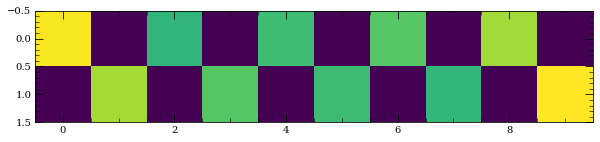

In [656]:
cpl_typ = "end"       #Coupling pattern
cpl_len = 5           #How many coupling pairs
init_state_ind= 0     #Where you want the initial excited state, 0 to 2*cpl_len
obs_basis = 1         #Number of excited states in observation basis
w1 = 1.5                #The first weight
w2 = 1               #The second weight
periods = 100            #How many time periods
time_step = 500        #How many time steps
diag,eVals,eVecs,ground = runHamiltonian(cpl_typ,cpl_len,init_state_ind,obs_basis,w1,w2,periods*np.pi,time_step)

In [36]:
fig = plt.figure(figsize=(20,10))    
for key,res in result.expect.items():
    plt.plot(tlist,res, label='state' +str(key))
    
pylab.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
animation.FuncAnimation(fig, updateZigZag,frames=500, interval=1).save('qwalkring.mp4', writer=writer)



/Users/jordankemp/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'plotHeatmap' is not defined

In [241]:
genAdjMid(4,1,2)

[[[2, 3], 1], [[3, 2], 1], [[2, 1], 1], [[1, 2], 1]]

In [585]:
def genBasisTest(n):
    basis = {}
    for i in range(n):
        
        eigv = qeye(2)+(1-2*(i==0))*sigmaz() #Conditionally adds/subtracts sigmaz
        key = str(int(i==0))

        for j in range(1,n):
            
            eigv = tensor(eigv, qeye(2)+(1-2*(i==j))*sigmaz())
            key += str(int(i==j))
        basis[key] = (1/2**n)*eigv
    
    return basis


In [591]:
b =genBasisArbitrary(3,2)


011 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
101 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
110 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [587]:
string = "010101011101"
l = list(string)
np.array(list(string)).astype(int)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1])